Author-  **Sumedh Patil**  Roll No : **51910008**

Aim: To teach Neural Network to read handwriting.


### Importing necessary libraries and dataset

---




In [1]:
#importing tensorflow library
import tensorflow as tf

#loading dataset provided by tensorflow
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Visualizing the sample dataset

---



8


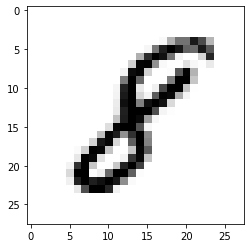

In [4]:
#visualizing the sample dataset
import matplotlib.pyplot as plt
%matplotlib inline
#selecting sample image
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

### Checking the shape(dim) of dataset

---



In [5]:
#checking the shape of training dataset, before channeling to cnn
x_train.shape

#60000: total images, 28,28 is its pixels size

(60000, 28, 28)

### Reshaping the dataset

---



In [8]:
#reshaping the array to 4-dims so can work with Keras API
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

#making values as float ,so can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the RGB codes by dividing it to max RGB values
x_train /=255
x_test /=255

print('x_train shape: ',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])


x_train shape:  (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Creating CNN model

---



In [0]:
#importing required keras modules and containing model and layers
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D


#creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #Flattening the 2D arrays for connected layers
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


### Compiling and fitting the model

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.5700 - accuracy: 0.8267
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2288 - accuracy: 0.9317
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.1685 - accuracy: 0.9500
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1384 - accuracy: 0.9574
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1213 - accuracy: 0.9630
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1092 - accuracy: 0.9667
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0990 - accuracy: 0.9687
Epoch 8/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0921 - accuracy: 0.9713
Epoch 9/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0846 - accuracy: 0.9733
Epoch 10/10
60000/60000 [============================

### Checking Accuracy of the model

In [11]:
model.evaluate(x_test,y_test)
##we got 97 percent accuracy

10000/10000 [==============================] - 1s 51us/step


[0.06632942986036651, 0.9793000221252441]

### Prediction with created cnn model

---


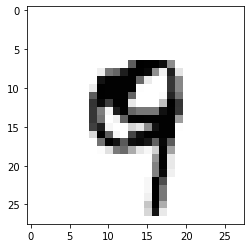

In [14]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

We can see above image shows 9 ,lets try to predict with our cnn model

In [15]:
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

9
